In [1]:
!pip install wordcloud -q
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/nithy/Downloads/spam.csv", encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

C:\Users\nithy\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

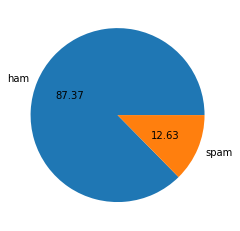

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [19]:
import nltk
nltk.download('punkt',quiet=True)

True

In [20]:
df['characters'] = df['text'].apply(len)

In [21]:
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
df[df['target'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
df[df['target'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [27]:
import seaborn as sns

<AxesSubplot:xlabel='characters', ylabel='Count'>

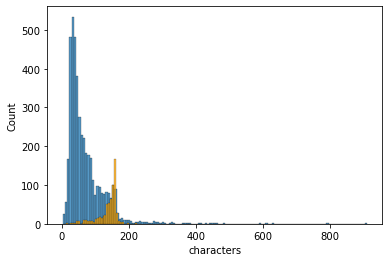

In [28]:
sns.histplot(df[df['target'] == 0]['characters'])
sns.histplot(df[df['target'] == 1]['characters'],color='orange')

<AxesSubplot:xlabel='words', ylabel='Count'>

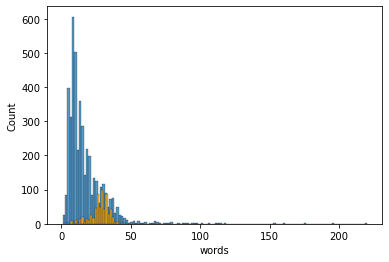

In [29]:
sns.histplot(df[df['target'] == 0]['words'])
sns.histplot(df[df['target'] == 1]['words'],color='orange')

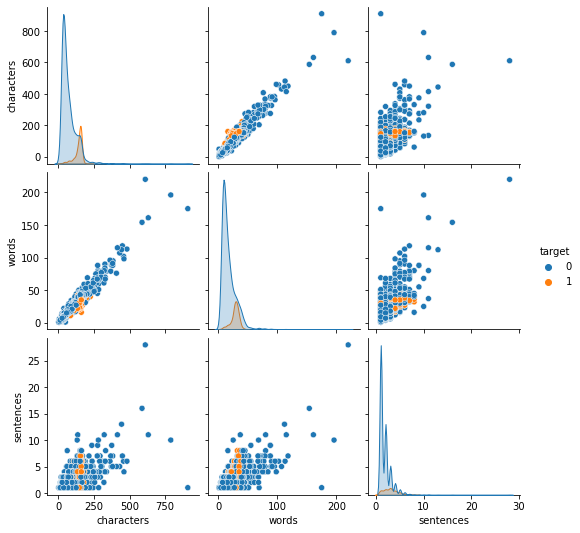

In [30]:
sns.pairplot(df,hue='target')

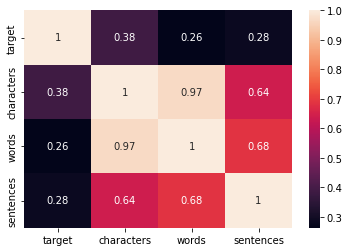

In [31]:
numeric_df = df.select_dtypes(include=['float64','int32','int64'])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()